# fit0 の実験ノート　2022.0318


In [1]:
import sys,os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'
import numpy as np
import matplotlib.pyplot as plt
import cv2
import wandb
import optuna
# from sympy import *
from sympy import diff,Symbol,Matrix,symbols,solve,simplify,binomial,lambdify,poly
from sympy.abc import a,b,c
# init_session()
from sympy import var
# px,py =var('px:4'),var('py:4')
from statistics import mean
import datetime
import time
datetime.datetime.now()

# Google Colaboratory の MyDrive パス
COLABRDROOT = "/content/drive/MyDrive/RadiShLab"

# ホーム
LOCALHOME = "."  # フォルダを絶対指定するならここを書き変えてください

# 環境判定（Google Colaboratory かどうかの判定）
try:
    from google.colab import drive
    drive.mount('/content/drive')
    sys.path.append(COLABRDROOT+'/rdlib')
    COLABORATORY = True
except ImportError:
    sys.path.append('./rdlib')
    COLABORATORY = False
import rdexper as rd

# フォルダ指定
labhome = COLABRDROOT if COLABORATORY else LOCALHOME

NSilF = labhome+'/RDSamples/NSilImages' # 正規化されたシルエット画像のフォルダ
imgs = rd.collectimages(NSilF)       # シルエット画像のリスト

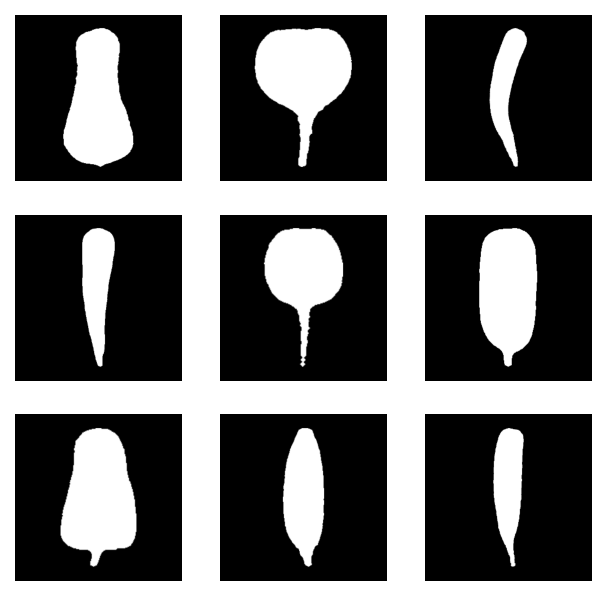

In [2]:
NSilF = labhome+'/RDSamples/NSilImages' # 正規化されたシルエット画像のフォルダ
imgs = rd.collectimages(NSilF)       # シルエット画像のリスト
#imgs = collectimages(NSilF)       # シルエット画像のリスト
plt.figure(figsize=(5,5),dpi=150)
for i in range(9):
  rd.plotimg(imgs[i],330+i+1)
  #plotimg(imgs[i],330+i+1)


In [3]:
import time

def meanerr(func, ts, Samples):
  sps = Samples
  fx, fy = func
  t = symbols('t')
  nfx, nfy = lambdify(t, fx, "numpy"), lambdify(t, fy, "numpy")
  onps = [[nfx(ts[i]), nfy(ts[i])] for i in range(len(ts))]
  return mean([np.sqrt((sps[i][0]-onps[i][0])**2+(sps[i][1]-onps[i][1])**2) for i in range(len(sps))])

def check0N(imgnum,Nsamples=65,Nfrom=5,Nto=20,err_th=0.65,withFig=True):
    results = {}
    for N in range(Nfrom,Nto+1):
      print(N,end='')
      start = time.process_time()
      img = imgs[imgnum]
      conAll = rd.getCntPairWithImg(img, mode=1) # 全周輪郭を得る
      Samples = rd.getSamples(conAll,N=Nsamples,mode='Equidistant')
      bez = rd.BezierCurve(N=N,samples=Samples) # インスタンス生成
      cps, func = bez.fit0(tpara=[])
      etime = time.process_time() - start
      odds = isOverFitting(func,bez.ts,conAll,tover=0.1,tunder=-0.1)
      err = meanerr(func,bez.ts,Samples)
      results[str(N)] = (odds,err,etime)
      if err < err_th:
        break
    print("\nN= {}  err = {}   etime = {}".format(N,err,etime))
    if withFig:
      rd.drawBez(imgs[imgnum],stt=0.0,end=1.0,bezL=func,cntL=Samples)
    return results

# check0N(imgnum, Samples, Nfrom, Nto, err_th, withFig)
imgnum: 処理象画像の番号  
Samples: 標本点の数  
Nfrom,Nto:  近似次数をNfrom から始めてNtoまで試す  
err_th: 目標とするあてはめ誤差　達成できればそこで処理を打ち切る  
withFig: True なら結果が図示する  

(補足)オーバフィッティング判定は行うが停止条件としては採用していない

161718192021222324
N= 24  err = 0.6181412097301506   etime = 5.875
Wall time: 37.1 s


{'16': (array([], dtype=int64), 1.1160622144990864, 2.609375),
 '17': (array([], dtype=int64), 0.7946460046458168, 3.046875),
 '18': (array([], dtype=int64), 0.7724205990353706, 3.296875),
 '19': (array([], dtype=int64), 0.7496932776336029, 3.546875),
 '20': (array([], dtype=int64), 0.7153673878314293, 3.953125),
 '21': (array([], dtype=int64), 0.7113879071539896, 4.40625),
 '22': (array([], dtype=int64), 0.6915098215029294, 4.8125),
 '23': (array([], dtype=int64), 0.6317099994675911, 5.375),
 '24': (array([], dtype=int64), 0.6181412097301506, 5.875)}

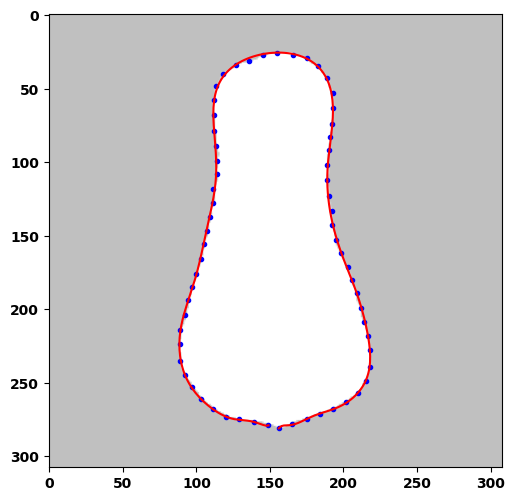

In [4]:
%%time
results= check0N(0,Nsamples=65,Nfrom=16,Nto=24,err_th=0.5,withFig=True)
results

15161718
N= 18  err = 0.9870404129984165   etime = 3.171875
Wall time: 11 s


{'15': (array([], dtype=int64), 1.2522892512580963, 2.21875),
 '16': (array([], dtype=int64), 1.2228329510183609, 2.515625),
 '17': (array([], dtype=int64), 1.0952129026912856, 3.0625),
 '18': (array([], dtype=int64), 0.9870404129984165, 3.171875)}

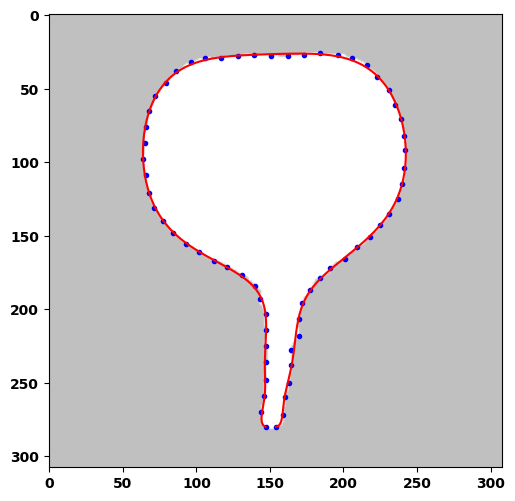

In [8]:
%%time
results= check0N(1,Nsamples=65,Nfrom=15,Nto=18,err_th=0.5,withFig=True)
results

192021222324
N= 24  err = 0.6144925818328378   etime = 5.765625
Wall time: 28 s


{'19': (array([], dtype=int64), 0.945893869683127, 3.5625),
 '20': (array([], dtype=int64), 0.7560472434678588, 3.96875),
 '21': (array([], dtype=int64), 0.7462088670368533, 4.375),
 '22': (array([], dtype=int64), 0.6894947664400286, 4.75),
 '23': (array([], dtype=int64), 0.6503994721257615, 5.203125),
 '24': (array([], dtype=int64), 0.6144925818328378, 5.765625)}

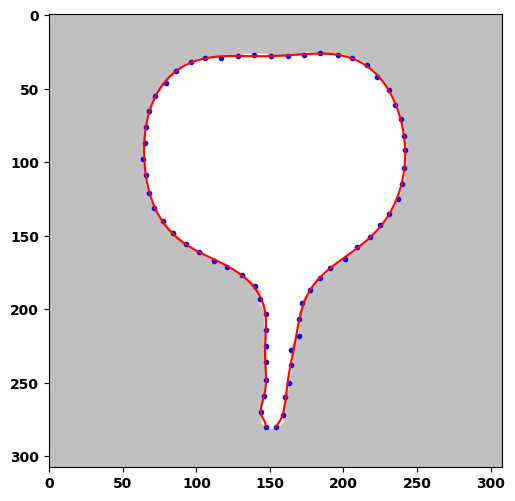

In [5]:
%%time
results= check0N(1,Nsamples=65,Nfrom=19,Nto=24,err_th=0.5,withFig=True)
results

192021222324
N= 24  err = 0.550139230997995   etime = 5.71875
Wall time: 28.1 s


{'19': (array([], dtype=int64), 1.0435786906328801, 3.578125),
 '20': (array([], dtype=int64), 0.9128332947704467, 3.953125),
 '21': (array([], dtype=int64), 0.8632684192280394, 4.484375),
 '22': (array([], dtype=int64), 0.776634619564677, 4.796875),
 '23': (array([], dtype=int64), 0.716984918248834, 5.234375),
 '24': (array([], dtype=int64), 0.550139230997995, 5.71875)}

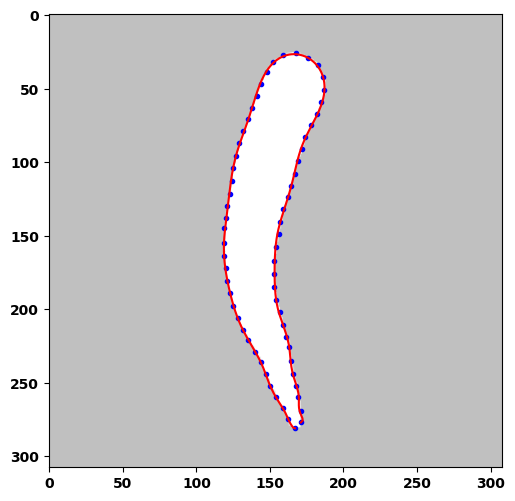

In [6]:
%%time
results= check0N(2,Nsamples=65,Nfrom=19,Nto=24,err_th=0.5,withFig=True)
results

10111213141516171819
N= 19  err = 0.4721021600306817   etime = 3.5625
Wall time: 22 s


{'10': (array([28, 29, 30, 31, 32, 33, 34, 35], dtype=int64),
  2.963311238810541,
  1.171875),
 '11': (array([29, 30, 31, 32, 63], dtype=int64), 2.458838149353468, 1.171875),
 '12': (array([29, 30, 31, 32], dtype=int64), 2.1509457093253395, 1.640625),
 '13': (array([31], dtype=int64), 1.5768951533622126, 1.875),
 '14': (array([], dtype=int64), 1.3416010598554227, 1.921875),
 '15': (array([62], dtype=int64), 1.0187812287342004, 2.1875),
 '16': (array([], dtype=int64), 0.8954394086176877, 2.53125),
 '17': (array([], dtype=int64), 0.6634174261401288, 2.859375),
 '18': (array([], dtype=int64), 0.6380129722961116, 3.203125),
 '19': (array([], dtype=int64), 0.4721021600306817, 3.5625)}

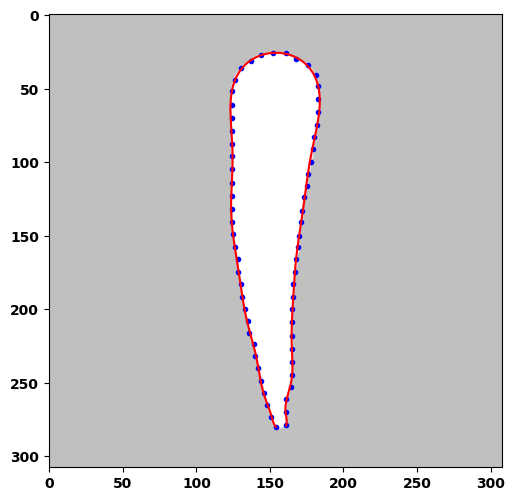

In [9]:
%%time
results= check0N(3,Nsamples=65,Nfrom=10,Nto=24,err_th=0.5,withFig=True)
results

18192021222324
N= 24  err = 0.6776313646289237   etime = 5.90625
Wall time: 31.3 s


{'18': (array([63], dtype=int64), 1.1140031272860447, 3.15625),
 '19': (array([], dtype=int64), 1.0468702675091006, 3.546875),
 '20': (array([], dtype=int64), 1.0016413182534292, 4.125),
 '21': (array([0], dtype=int64), 0.968007782803697, 4.5),
 '22': (array([1], dtype=int64), 0.7758415697510135, 4.796875),
 '23': (array([1], dtype=int64), 0.7062156515858707, 5.234375),
 '24': (array([], dtype=int64), 0.6776313646289237, 5.90625)}

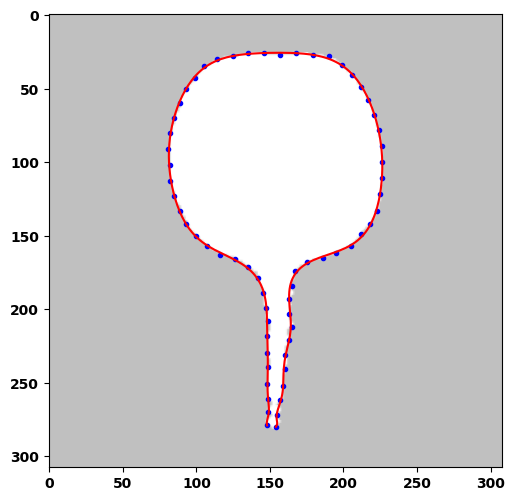

In [10]:
%%time
results= check0N(4,Nsamples=65,Nfrom=18,Nto=24,err_th=0.5,withFig=True)
results

101112131415161718192021222324
N= 24  err = 0.4526622495161467   etime = 5.734375
Wall time: 46.4 s


{'10': (array([], dtype=int64), 2.01541287619515, 0.984375),
 '11': (array([61], dtype=int64), 1.3272595373265665, 1.1875),
 '12': (array([], dtype=int64), 1.2181683341585432, 1.40625),
 '13': (array([], dtype=int64), 1.1428267902600702, 1.921875),
 '14': (array([], dtype=int64), 1.1483417793864361, 1.921875),
 '15': (array([], dtype=int64), 0.747524885592218, 2.203125),
 '16': (array([], dtype=int64), 0.7075674418941661, 2.53125),
 '17': (array([], dtype=int64), 0.710126497120555, 2.859375),
 '18': (array([], dtype=int64), 0.6654825494702145, 3.28125),
 '19': (array([], dtype=int64), 0.6448483737933479, 3.5625),
 '20': (array([], dtype=int64), 0.5885474770246173, 3.96875),
 '21': (array([], dtype=int64), 0.5611483685025324, 4.359375),
 '22': (array([], dtype=int64), 0.5456454020937772, 4.8125),
 '23': (array([], dtype=int64), 0.5039404626562498, 5.25),
 '24': (array([], dtype=int64), 0.4526622495161467, 5.734375)}

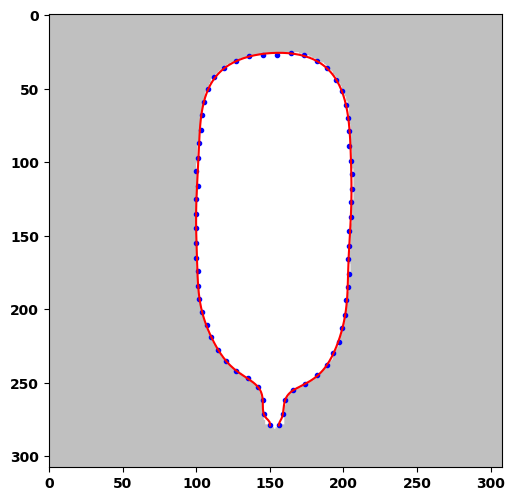

In [11]:
%%time
results= check0N(5,Nsamples=65,Nfrom=10,Nto=24,err_th=0.5,withFig=True)
results

101112131415161718192021222324
N= 24  err = 0.5409914590835472   etime = 5.78125
Wall time: 46.8 s


{'10': (array([ 0,  1,  7, 29, 30, 31, 63], dtype=int64),
  4.074566031819148,
  1.09375),
 '11': (array([ 0,  1,  2, 60, 61, 62, 63], dtype=int64),
  2.7097969842833862,
  1.1875),
 '12': (array([1, 2], dtype=int64), 1.905730078154579, 1.421875),
 '13': (array([1, 2], dtype=int64), 1.84397679600483, 1.8125),
 '14': (array([], dtype=int64), 1.7078096429404872, 1.921875),
 '15': (array([], dtype=int64), 1.2054084236107259, 2.4375),
 '16': (array([], dtype=int64), 1.075171014449516, 2.53125),
 '17': (array([2], dtype=int64), 0.7901416320480551, 2.890625),
 '18': (array([2], dtype=int64), 0.7479907413057622, 3.21875),
 '19': (array([2], dtype=int64), 0.7027168524352511, 3.828125),
 '20': (array([], dtype=int64), 0.669671683917895, 3.96875),
 '21': (array([], dtype=int64), 0.6159710391594003, 4.390625),
 '22': (array([], dtype=int64), 0.5895232845248539, 4.796875),
 '23': (array([], dtype=int64), 0.5766198368875406, 5.265625),
 '24': (array([], dtype=int64), 0.5409914590835472, 5.78125)}

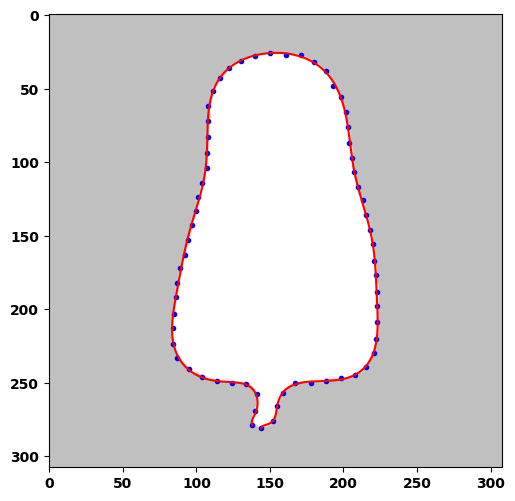

In [12]:
%%time
results= check0N(6,Nsamples=65,Nfrom=10,Nto=24,err_th=0.5,withFig=True)
results

15161718192021222324
N= 24  err = 0.6747264237728716   etime = 5.734375
Wall time: 39.3 s


{'15': (array([ 1, 29, 30, 31, 32], dtype=int64),
  1.4021421300230412,
  2.234375),
 '16': (array([29, 30, 31, 32], dtype=int64), 1.1453231362782899, 2.546875),
 '17': (array([29, 30, 31, 32], dtype=int64), 1.101580521043766, 2.875),
 '18': (array([29, 30, 31, 32], dtype=int64), 1.0168559103445343, 3.296875),
 '19': (array([29, 30, 31, 32], dtype=int64), 0.9755840861429346, 3.6875),
 '20': (array([31, 32], dtype=int64), 0.935754920980024, 3.96875),
 '21': (array([31, 32], dtype=int64), 0.8671945967703507, 4.34375),
 '22': (array([31, 32], dtype=int64), 0.7674096538961682, 4.84375),
 '23': (array([31, 32], dtype=int64), 0.7146562355333269, 5.390625),
 '24': (array([31, 32], dtype=int64), 0.6747264237728716, 5.734375)}

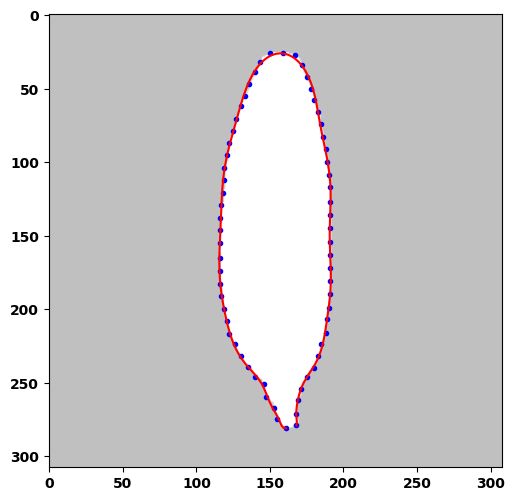

In [13]:
%%time
results= check0N(7,Nsamples=65,Nfrom=15,Nto=24,err_th=0.5,withFig=True)
results

15161718192021222324
N= 24  err = 0.5180628286577678   etime = 5.796875
Wall time: 39.3 s


{'15': (array([29, 30, 33], dtype=int64), 1.3925503393432084, 2.265625),
 '16': (array([29, 30, 33], dtype=int64), 1.249496441163297, 2.671875),
 '17': (array([29], dtype=int64), 1.0104455142998778, 2.84375),
 '18': (array([], dtype=int64), 0.879464485982862, 3.21875),
 '19': (array([], dtype=int64), 0.7811616479473432, 3.546875),
 '20': (array([], dtype=int64), 0.7112979548125267, 3.984375),
 '21': (array([], dtype=int64), 0.6848929549212004, 4.375),
 '22': (array([], dtype=int64), 0.6319226539976377, 4.828125),
 '23': (array([], dtype=int64), 0.5600630611033386, 5.296875),
 '24': (array([], dtype=int64), 0.5180628286577678, 5.796875)}

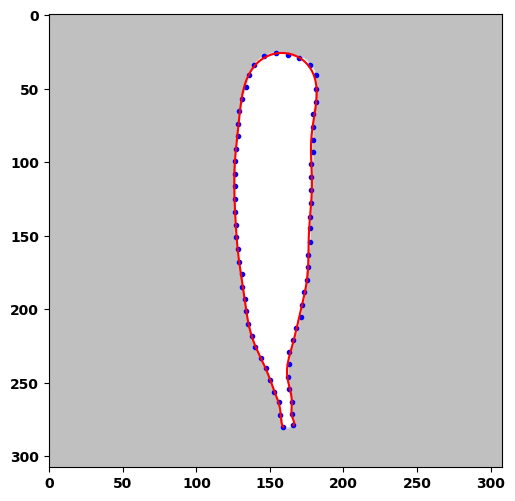

In [14]:
%%time
results= check0N(8,Nsamples=65,Nfrom=15,Nto=24,err_th=0.5,withFig=True)
results